<div style="color: navy; text-align: center; font-family: 'Georgia', serif; font-size: 32px; font-weight: bold;">
    Description
</div>

<div style="color: green; text-align: left; font-family: 'Calibri', sans-serif; font-size: 32px;">
    Hello, dear colleagues!
</div>

<div style="color: dark-blue; text-align: left; font-family: 'Calibri', sans-serif; font-size: 24px;">
    This notebook was made in educational purposes, every model was created by myself using official documentation.
    I hope it will be useful for other beginners in ML.
    If you have check it, please, upvote!
    If you have any questions or suggestions about improvements, leave it in comment section.
</div>


# Libraries import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import plotly
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install lazypredict

# Data import

In [3]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [4]:
sample_submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [5]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Feature engineering and EDA

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_data.head()
for col in train_data.columns:
    print(col, train_data[col].unique(), len(train_data[col].unique()))

PassengerId ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] 8693
HomePlanet ['Europa' 'Earth' 'Mars' nan] 4
CryoSleep [False True nan] 3
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 6561
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 4
Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.] 81
VIP [False True nan] 3
RoomService [   0.  109.   43. ... 1569. 8586.  745.] 1274
FoodCourt [   0.    9. 3576. ... 3208. 6819. 4688.] 1508
ShoppingMall [   0.   25.  371. ... 1085.  510. 1872.] 1116
Spa [   0.  549. 6715. ... 2868. 1107. 1643.] 1328
VRDeck [   0.   44.   49. ... 1164.  971. 3235.] 1307
Name ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey C

In [8]:
nan_count_per_row = train_data.isna().sum(axis=0)
print(nan_count_per_row)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [9]:
arr = []
for i in range(len(train_data)):
    try:   
        arr.append(train_data['Name'][i].split(' ')[1])
    except:
        arr.append(f'NoName_{i}')
        
train_data['SecondName'] = arr
train_data.drop('Name',axis=1,inplace=True)

arr = []
for i in range(len(test_data)):
    try:   
        arr.append(test_data['Name'][i].split(' ')[1])
    except:
        arr.append(f'NoName_{i}')
        
test_data['SecondName'] = arr
test_data.drop('Name',axis=1,inplace=True)

In [10]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='mean')
numerical_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']
test_data[numerical_columns] = numerical_imputer.fit_transform(test_data[numerical_columns])
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
test_data[categorical_columns] = categorical_imputer.fit_transform(test_data[categorical_columns])


numerical_imputer = SimpleImputer(strategy='mean')
numerical_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']
train_data[numerical_columns] = numerical_imputer.fit_transform(train_data[numerical_columns])
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])

In [11]:
train_data['Count'] = train_data.groupby(['SecondName', 'HomePlanet', 'Destination'])['SecondName'].transform('count')
test_data['Count'] = test_data.groupby(['SecondName', 'HomePlanet', 'Destination'])['SecondName'].transform('count')

In [12]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,SecondName,Count
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Ofracculy,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Vines,4
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Susent,5
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Susent,5
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Santantines,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,Noxnuther,2
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,Mondalley,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,Connon,3
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,Hontichre,2


<Axes: >

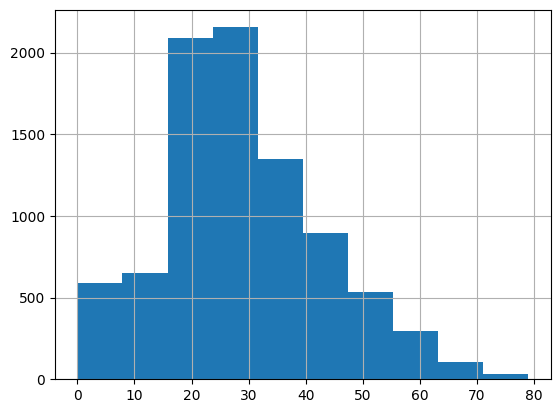

In [13]:
train_data.Age.hist()

In [14]:
age_bins = [-1, 12, 18, 25, 30, 50, 1.e+10]  # Границы интервалов
age_labels = ['Age_0-12', 'Age_13-17', 'Age_18-25', 'Age_26-30', 'Age_31-50', 'Age_51+']
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels).astype('object')
test_data['Age_Group'] = pd.cut(test_data['Age'], bins=age_bins, labels=age_labels).astype('object')

In [15]:
train_data['Deck'], train_data['CabinRegion'], train_data['Side'] = train_data.Cabin.str.split('/', expand=True)[0].astype('object'), train_data.Cabin.str.split('/', expand=True)[1].astype('float'), train_data.Cabin.str.split('/', expand=True)[2].astype('object')
test_data['Deck'],test_data['CabinRegion'], test_data['Side'] = test_data.Cabin.str.split('/', expand=True)[0].astype('object'), test_data.Cabin.str.split('/', expand=True)[1].astype('float'), test_data.Cabin.str.split('/', expand=True)[2].astype('object')

In [16]:
age_bins = [-10, 300, 600, 900, 1200, 1500, 1800, 1.e+10]  # Границы интервалов
age_labels = ['Cab_r_1', 'Cab_r_2', 'Cab_r_3', 'Cab_r_4', 'Cab_r_5', 'Cab_r_6', 'Cab_r_7']
train_data['CabinRegionGroup'] = pd.cut(train_data['CabinRegion'], bins=age_bins, labels=age_labels).astype('object')
test_data['CabinRegionGroup'] = pd.cut(test_data['CabinRegion'], bins=age_bins, labels=age_labels).astype('object')

In [17]:
train_data['id0'],train_data['id1'] = train_data.PassengerId.str.split('_', expand=True)[0].astype('object'), train_data.PassengerId.str.split('_', expand=True)[1].astype('object')
test_data['id0'],test_data['id1'] = test_data.PassengerId.str.split('_', expand=True)[0].astype('object'), test_data.PassengerId.str.split('_', expand=True)[1].astype('object')

In [18]:
train_data['TotalCosts'] = train_data.RoomService + train_data.FoodCourt + train_data.ShoppingMall + train_data.Spa + train_data.VRDeck
test_data['TotalCosts'] = test_data.RoomService + test_data.FoodCourt + test_data.ShoppingMall + test_data.Spa + test_data.VRDeck

In [19]:
# for i in range(len(train_data[['Age','Age_Group']])):
#     print(train_data[['Age','Age_Group']].iloc[i])

In [20]:
train_data = train_data.drop(['PassengerId','Cabin','id0','SecondName','Count'],axis=1)
test_data = test_data.drop(['Cabin','id0','SecondName','Count'],axis=1)

# Data Preparing

In [21]:
# train_data.drop('PassengerId',axis=1,inplace=True)

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        8693 non-null   object 
 1   CryoSleep         8693 non-null   object 
 2   Destination       8693 non-null   object 
 3   Age               8693 non-null   float64
 4   VIP               8693 non-null   object 
 5   RoomService       8693 non-null   float64
 6   FoodCourt         8693 non-null   float64
 7   ShoppingMall      8693 non-null   float64
 8   Spa               8693 non-null   float64
 9   VRDeck            8693 non-null   float64
 10  Transported       8693 non-null   bool   
 11  Age_Group         8693 non-null   object 
 12  Deck              8693 non-null   object 
 13  CabinRegion       8693 non-null   float64
 14  Side              8693 non-null   object 
 15  CabinRegionGroup  8693 non-null   object 
 16  id1               8693 non-null   object 


In [23]:
# train_data['Count'] = train_data['Count'].astype('object')
# test_data['Count'] = test_data['Count'].astype('object')

In [24]:
train_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Group,Deck,CabinRegion,Side,CabinRegionGroup,id1,TotalCosts
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Age_31-50,B,0.0,P,Cab_r_1,01,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Age_18-25,F,0.0,S,Cab_r_1,01,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Age_51+,A,0.0,S,Cab_r_1,01,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Age_31-50,A,0.0,S,Cab_r_1,02,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Age_13-17,F,1.0,S,Cab_r_1,01,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,Age_31-50,A,98.0,P,Cab_r_1,01,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,Age_13-17,G,1499.0,S,Cab_r_5,01,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,Age_26-30,G,1500.0,S,Cab_r_5,01,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,Age_31-50,E,608.0,S,Cab_r_3,01,4637.0


In [25]:
train_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Group,Deck,CabinRegion,Side,CabinRegionGroup,id1,TotalCosts
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Age_31-50,B,0.0,P,Cab_r_1,01,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Age_18-25,F,0.0,S,Cab_r_1,01,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Age_51+,A,0.0,S,Cab_r_1,01,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Age_31-50,A,0.0,S,Cab_r_1,02,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Age_13-17,F,1.0,S,Cab_r_1,01,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,Age_31-50,A,98.0,P,Cab_r_1,01,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,Age_13-17,G,1499.0,S,Cab_r_5,01,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,Age_26-30,G,1500.0,S,Cab_r_5,01,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,Age_31-50,E,608.0,S,Cab_r_3,01,4637.0


In [26]:
train_acc = []

In [27]:
print(len(train_data[train_data.Transported == False]))
print(len(train_data[train_data.Transported == True]))

4315
4378


In [28]:
val = 0.3

In [29]:
# i = 0
# while True:
#     X, y = train_data.drop('Transported', axis=1), train_data['Transported']
#     X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=val, random_state=i)
#     unique_elements, counts = np.unique(np.array(y_train), return_counts=True)

#     element_counts = dict(zip(unique_elements, counts))
        
#     if abs(element_counts[False] - element_counts[True]) < 3:
#         break
        
#     i+=1
#     if i==10000:
#         break

In [30]:
X, y = train_data.drop('Transported', axis=1), train_data['Transported']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=val, random_state=280309)

In [31]:
features_to_normalize = list(X.select_dtypes(include=['float64']).columns)
features_to_normalize

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'CabinRegion',
 'TotalCosts']

In [32]:
object_columns = list(X.select_dtypes(include=['object']).columns)
object_columns

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Age_Group',
 'Deck',
 'Side',
 'CabinRegionGroup',
 'id1']

In [33]:
scaler = StandardScaler()
X_train[features_to_normalize] = scaler.fit_transform(X_train[features_to_normalize])
X_valid[features_to_normalize] = scaler.fit_transform(X_valid[features_to_normalize])
test_data[features_to_normalize] = scaler.fit_transform(test_data[features_to_normalize])

In [34]:
for column in X_train.select_dtypes(include=['category']).columns:
    X_train[column] = X_train[column].astype(str)
    
for column in X_valid.select_dtypes(include=['category']).columns:
    X_valid[column] = X_valid[column].astype(str)
    
for column in test_data.select_dtypes(include=['category']).columns:
    test_data[column] = test_data[column].astype(str)

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    
label_encoders = {}
for column in X_valid.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X_valid[column] = label_encoders[column].fit_transform(X_valid[column])

for column in test_data.drop('PassengerId',axis=1).select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    test_data[column] = label_encoders[column].fit_transform(test_data[column])

In [36]:
# num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalCosts','Age']
# cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"id1",'Age_Group','Count']

In [37]:
# X_train

In [38]:
# X_train = pd.get_dummies(X_train, columns=X_train.select_dtypes(include=['object','int']).columns)

In [39]:
# X_valid = pd.get_dummies(X_valid, columns=X_valid.select_dtypes(include=['object','int']).columns)

In [40]:
# test_data = pd.get_dummies(test_data, columns=test_data.select_dtypes(include=['object','int']).columns)

In [41]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_Group,Deck,CabinRegion,Side,CabinRegionGroup,id1,TotalCosts
4279,0,0,2,-0.275670,0,-0.006970,-0.161901,-0.005259,-0.277197,0.210073,2,5,0.510200,1,2,0,-0.120204
5995,2,0,2,0.004712,0,2.991230,-0.287849,-0.283445,-0.277197,-0.267625,3,5,1.219864,1,4,0,0.257723
5723,0,0,2,-0.696242,0,-0.339582,0.194439,-0.283445,-0.277197,-0.267625,2,4,-0.393729,1,1,0,-0.248847
3478,0,1,2,-0.345765,0,-0.344083,-0.287849,-0.283445,-0.277197,-0.267625,2,6,0.020572,0,2,1,-0.527020
6308,2,0,2,-1.957959,0,-0.344083,-0.287849,-0.283445,-0.277197,-0.267625,0,5,1.566766,0,4,0,-0.527020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,1,0,2,0.074807,0,-0.344083,-0.177261,-0.139331,6.632846,-0.144068,3,1,-0.934897,1,0,1,2.350725
3457,0,0,2,-0.766338,0,-0.317077,-0.286621,2.549193,-0.276304,-0.265885,1,6,0.012642,0,2,0,0.105576
4158,0,0,2,0.775761,0,-0.344083,0.265707,-0.283445,-0.277197,-0.190184,4,4,-0.605835,1,0,0,-0.177539
8251,0,1,0,1.056142,0,-0.344083,-0.287849,-0.283445,-0.277197,-0.267625,4,1,-0.508703,1,1,1,-0.527020


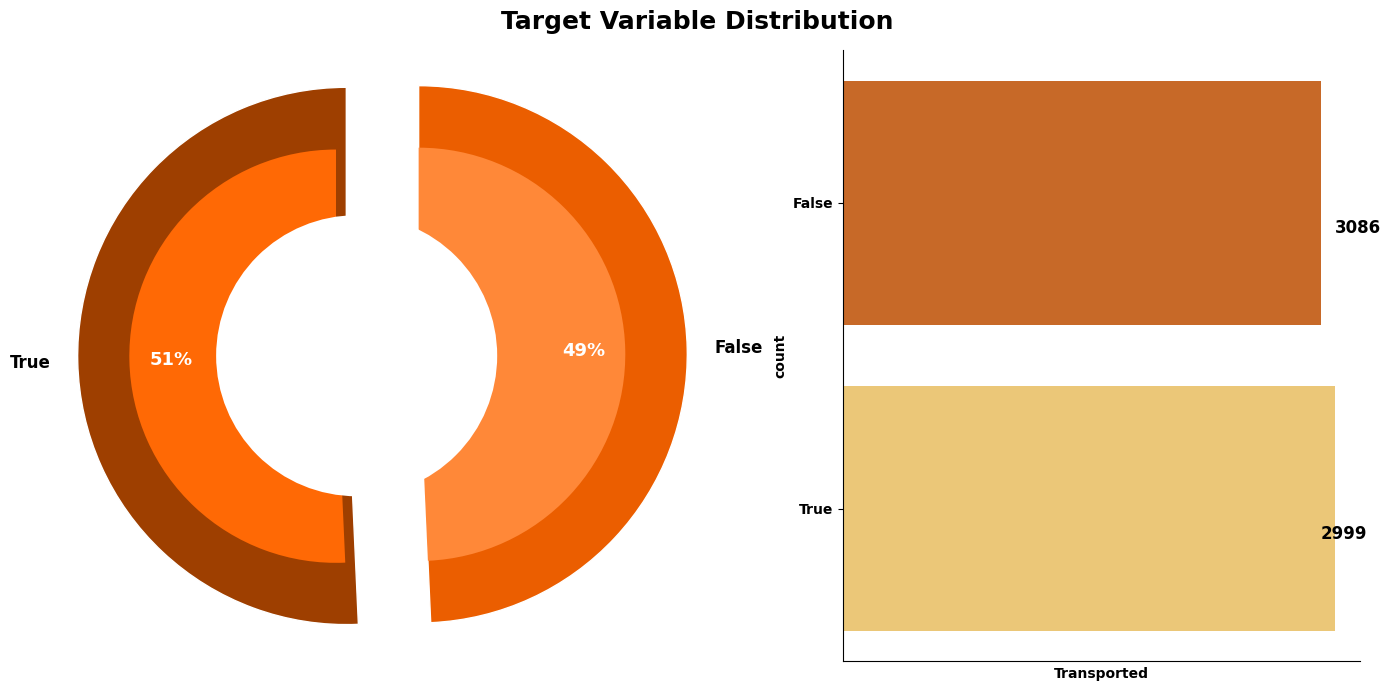

In [42]:
# https://www.kaggle.com/code/kimtaehun/eda-and-baseline-with-multiple-models
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    # Set background color
    
    f, ax = plt.subplots(1, 2, figsize=(14, 7))
    plt.subplots_adjust(wspace=0.2)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9E3F00', '#eb5e00']
    inner_colors = ['#ff6905', '#ff8838']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 13, 
        'weight': 'bold', 
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='YlOrBr_r', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='black', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_count(pd.DataFrame({'Transported':y_train.values}).replace({1:True,0:False}), 'Transported', 'Target Variable Distribution')

In [43]:
y_train = y_train.replace({True:1,False:0})
y_valid = y_valid.replace({True:1,False:0})

# Lazy Classifier

In [44]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit( X_train, X_valid , y_train, y_valid)
models

100%|██████████| 29/29 [00:18<00:00,  1.61it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.81,0.81,0.81,0.81,1.02
RandomForestClassifier,0.80,0.80,0.80,0.80,1.12
ExtraTreesClassifier,0.80,0.80,0.80,0.80,0.84
XGBClassifier,0.80,0.80,0.80,0.80,0.91
SVC,0.80,0.80,0.80,0.80,1.67
NuSVC,0.80,0.80,0.80,0.80,2.63
AdaBoostClassifier,0.79,0.79,0.79,0.79,0.41
SGDClassifier,0.79,0.79,0.79,0.79,0.10
LogisticRegression,0.79,0.79,0.79,0.79,0.19


# Catboost Classifier

In [45]:
from catboost import CatBoostClassifier
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


def objective_cat(trial):
    """Define the objective function"""

    params = {
        "iterations" : trial.suggest_int("iterations", 100, 5000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01,1.0),
        "depth" : trial.suggest_int("depth", 1, 10),
        "l2_leaf_reg" : trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "bootstrap_type" : trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        "random_strength" : trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "bagging_temperature" : trial.suggest_float("bagging_temperature", 0.0, 10.0),
        "od_type" : trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait" : trial.suggest_int("od_wait", 10, 50),
        "verbose" : False
        
    }


    model_cat = CatBoostClassifier(**params)
    scores = cross_val_score(model_cat, X_train, y_train, cv=10, scoring='accuracy')  
    
    return scores.mean() 

In [46]:
study_cat = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_cat.optimize(objective_cat, n_trials=100,show_progress_bar=True)

[I 2023-10-05 16:33:14,052] A new study created in memory with name: no-name-73543844-ef0d-403e-b3f4-465c6e271821


  0%|          | 0/100 [00:00<?, ?it/s]

Training has stopped (degenerate solution on iteration 94, probably too small l2-regularization, try to increase it)
Training has stopped (degenerate solution on iteration 156, probably too small l2-regularization, try to increase it)


In [47]:
# Print the best parameters
print('Best parameters', study_cat.best_params)

Best parameters {'iterations': 3328, 'learning_rate': 0.01325100623667744, 'depth': 5, 'l2_leaf_reg': 43.41524302678372, 'bootstrap_type': 'Bayesian', 'random_strength': 0.5040719838233967, 'bagging_temperature': 0.38294034331046656, 'od_type': 'Iter', 'od_wait': 43}


In [48]:
cat = CatBoostClassifier(**study_cat.best_params, verbose=False)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, y_pred))

Accuracy:  0.8090490797546013


# LightGMB classifier 

In [49]:
from lightgbm import LGBMClassifier
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['binary']),
        'metric': trial.suggest_categorical('metric', ['logloss']),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 5000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "random_state" : trial.suggest_categorical('random_state', [17]),
    }

    model_lgb = LGBMClassifier(**params)
    scores = cross_val_score(model_lgb, X_train, y_train, cv=10, scoring='accuracy')  
    
    return scores.mean() 

In [50]:
study_lgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=100,show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [51]:
# Print the best parameters
print('Best parameters', study_lgb.best_params)

Best parameters {'objective': 'binary', 'metric': 'logloss', 'max_depth': 8, 'min_child_samples': 15, 'learning_rate': 0.08205670985912164, 'n_estimators': 120, 'min_child_weight': 3, 'subsample': 0.3018963569497683, 'colsample_bytree': 0.5840440437116645, 'reg_alpha': 0.3073697044900262, 'reg_lambda': 0.5209897312371835, 'random_state': 17}


In [52]:
lgb = LGBMClassifier(**study_lgb.best_params)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, y_pred))

Accuracy:  0.8086656441717791


# XGBoost Classifier

In [53]:
from xgboost import XGBClassifier
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric':trial.suggest_categorical('eval_metric', ['mlogloss']),
    }

    model_xgb = XGBClassifier(**params)
    scores = cross_val_score(model_xgb, X_train, y_train, cv=10, scoring='accuracy')  
    
    return scores.mean() 

In [54]:
study_xgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=100,show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [55]:
# Print the best parameters
print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 5, 'learning_rate': 0.012827674002275684, 'n_estimators': 2032, 'min_child_weight': 6, 'gamma': 2.1467393868783556e-07, 'subsample': 0.9839914105438529, 'colsample_bytree': 0.5582591242743564, 'reg_alpha': 0.012646883008678979, 'reg_lambda': 3.478687466221373e-06, 'eval_metric': 'mlogloss'}


In [56]:
xgb = XGBClassifier(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, y_pred))

Accuracy:  0.8002300613496932


# RFC

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
import optuna
def objective_rfc(trial):
    """Define the objective function"""
    
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
        'bootstrap':trial.suggest_categorical('bootstrap', [True]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 15),
    }
    
    model_rfc = RandomForestClassifier(**params)
    scores = cross_val_score(model_rfc, X_train, y_train, cv=10, scoring='accuracy')  
    
    return scores.mean()

In [58]:
study_rfc = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_rfc.optimize(objective_rfc, n_trials=100,show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [59]:
# Print the best parameters
print('Best parameters', study_rfc.best_params)

Best parameters {'max_depth': 14, 'n_estimators': 1255, 'bootstrap': True, 'min_samples_split': 12, 'min_samples_leaf': 3}


In [60]:
rfc = RandomForestClassifier(**study_rfc.best_params)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, y_pred))

Accuracy:  0.8059815950920245


# Optimization 

In [61]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import optuna

def objective(trial):
    weights = {}
    weights['cat'] = trial.suggest_uniform('cat_weight', 0.1, 2.0)
    weights['lgb'] = trial.suggest_uniform('lgb_weight', 0.1, 2.0)
    weights['xgb'] = trial.suggest_uniform('xgb_weight', 0.1, 2.0)
    weights['rfc'] = trial.suggest_uniform('rfc_weight', 0.1, 2.0)

    voting = VotingClassifier(estimators=[
        ('cat', cat),
        ('lgb', lgb),
        ('xgb', xgb),
        ('rfc', rfc)
    ], voting='soft', weights=list(weights.values()))

    voting.fit(X_train, y_train)

    voting_pred = voting.predict(X_valid)

    accuracy = accuracy_score(y_valid, voting_pred)

    return -accuracy  

if __name__ == '__main__':
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=10, show_progress_bar=True)

    # Получите лучшие веса
    best_weights = {
        'cat': study.best_params['cat_weight'],
        'lgb': study.best_params['lgb_weight'],
        'xgb': study.best_params['xgb_weight'],
        'rfc': study.best_params['rfc_weight']
    }

    best_voting = VotingClassifier(estimators=[
        ('cat', cat),
        ('lgb', lgb),
        ('xgb', xgb),
        ('rfc', rfc)
    ], voting='soft', weights=list(best_weights.values()))

    best_voting.fit(X_train, y_train)

    best_voting_pred = best_voting.predict(X_valid)

    best_accuracy = accuracy_score(y_valid, best_voting_pred)
    print('Лучшие веса:', best_weights)
    print('Лучшая точность:', best_accuracy)

  0%|          | 0/10 [00:00<?, ?it/s]

Лучшие веса: {'cat': 0.6026190822236179, 'lgb': 0.24319080722252817, 'xgb': 0.5485656248612903, 'rfc': 0.8457587896847433}
Лучшая точность: 0.8101993865030674


# Stacking

In [62]:
import matplotlib
matplotlib.rc_file_defaults()

In [63]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('cat', cat),
                                      ('lgb', lgb), 
                                      ('xgb', xgb),
                                      ('rfc', rfc)], voting='soft')
voting.fit(X_train,y_train)
voting_pred = voting.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, voting_pred))

Accuracy:  0.8063650306748467


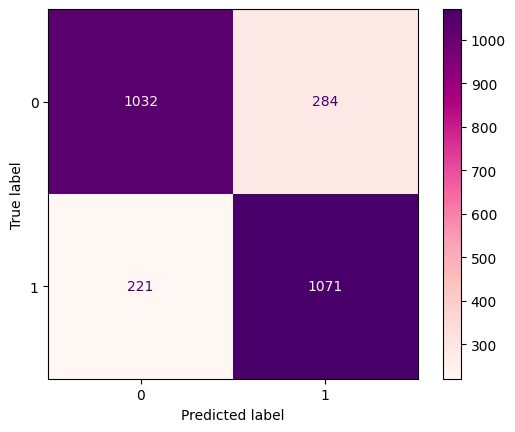

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(voting, X_valid, y_valid,cmap="RdPu");

In [65]:
from sklearn.ensemble import StackingClassifier
stk = StackingClassifier(estimators=[('cat', cat),
                                      ('lgb', lgb), 
                                      ('xgb', xgb),
                                      ('rfc', rfc)])
stk.fit(X_train,y_train)
stk_pred = stk.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, stk_pred))

Accuracy:  0.8063650306748467


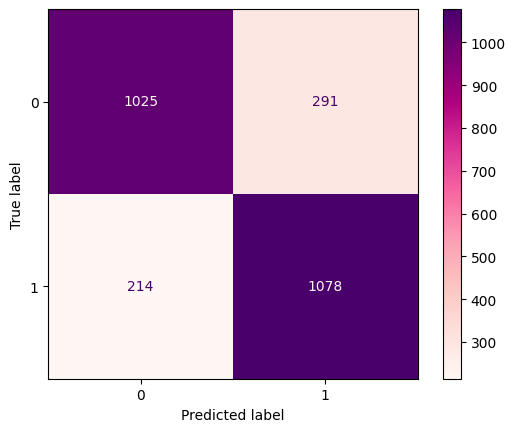

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(stk, X_valid, y_valid,cmap="RdPu");

# Prediction

In [67]:
sub = pd.DataFrame(test_data['PassengerId'])
sub["Transported"]=best_voting.predict(test_data.drop(columns=["PassengerId"]))
sub["Transported"]=sub["Transported"].map({ 0:False, 1:True})
sub.to_csv('submission_weighted.csv',index=False)
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [68]:
sub = pd.DataFrame(test_data['PassengerId'])
sub["Transported"]=stk.predict(test_data.drop(columns=["PassengerId"]))
sub["Transported"]=sub["Transported"].map({ 0:False, 1:True})
sub.to_csv('submission_stk.csv',index=False)
sub

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [69]:
sub = pd.DataFrame(test_data['PassengerId'])
sub["Transported"]=voting.predict(test_data.drop(columns=["PassengerId"]))
sub["Transported"]=sub["Transported"].map({ 0:False, 1:True})
sub.to_csv('submission_voting.csv',index=False)
sub

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
